## Prepare Libraries and Class Term Data

In [2]:
import pandas as pd
import numpy as np

### Merge three years of program data

In [4]:
df1 = pd.read_csv('Applied Stats Final Project/CASPA-2022-2023.csv')
df1 = df1.loc[df1['decision_code'] == 'Matriculated']
df1['Cycle'] = '2022-2023'
df1['Cohort'] = 'Class of 2025'

In [5]:
merge1 = pd.read_csv('Applied Stats Final Project/Student Grades-FA23.csv')
merge1 = merge1[['Textbox11', 'Textbox12', 'TermGPA']]
merge1 = merge1.rename(columns={'Textbox11':'last_name', 'Textbox12':'first_name'})
df1['last_name'] = df1['last_name'].str.lower()
merge1['last_name'] = merge1['last_name'].str.lower()
merged1 = pd.merge(df1, merge1, on='last_name', how='inner')
merged1 = merged1.drop_duplicates()

In [6]:
merged1.isna().sum()

cas_id                                                          0
first_name_x                                                    0
last_name                                                       0
biochemistry_gpa                                                0
biology_zoology_gpa                                             0
english_gpa                                                     0
behavioral_sciences_gpa                                         0
baccalaureate_total_gpa                                         0
overall_total_gpa                                               0
overall_science_total_gpa                                       0
post_baccalaureate_total_gpa                                    0
prerequisite_required_coursework_gpa                            0
employment_experience_hours_total                              22
extracurricular_activities_experience_hours_total              18
health_related_experience_experience_experience_hours_total    15
leadership

In [7]:
df2 = pd.read_csv('Applied Stats Final Project/CASPA-2023-2024.csv')
df2 = df2.loc[df2['decision_code'] == 'Matriculated']
df2['Cycle'] = '2023-2024'
df2['Cohort'] = 'Class of 2026'

In [8]:
merge2 = pd.read_csv('Applied Stats Final Project/Student Grades-FA24.csv')
merge2 = merge2[['Textbox11', 'Textbox12', 'TermGPA']]
merge2 = merge2.rename(columns={'Textbox11':'last_name', 'Textbox12':'first_name'})
merged2 = pd.merge(df2, merge2, on='last_name', how='inner')
merged2 = merged2.drop_duplicates()

In [9]:
merged2.isna().sum()

first_name_x                                                    0
last_name                                                       0
cas_id                                                          0
biochemistry_gpa                                                0
biology_zoology_gpa                                             0
inorganic_chemistry_gpa                                         0
physics_gpa                                                     0
organic_chemistry_gpa                                           0
other_sciences_gpa                                              0
mathematics_gpa                                                 0
english_gpa                                                     0
behavioral_sciences_gpa                                         0
other_non_science_gpa                                           0
overall_total_gpa                                               0
baccalaureate_total_gpa                                         0
overall_sc

In [10]:
df3 = pd.read_csv('Applied Stats Final Project/CASPA-2021-2022.csv')
df3 = df3.loc[df3['decision_code'] == 'Matriculated']
df3['Cycle'] = '2021-2022'
df3['Cohort'] = 'Class of 2024'

In [11]:
df3.columns

Index(['cas_id', 'first_name', 'last_name', 'post_baccalaureate_total_gpa',
       'cumulative_undergraduate_total_gpa', 'overall_total_gpa',
       'baccalaureate_total_gpa', 'baccalaureate_science_total_gpa',
       'cumulative_undergraduate_science_total_gpa',
       'overall_science_total_gpa', 'prerequisite_recommended_coursework_gpa',
       'prerequisite_required_coursework_gpa', 'application_status',
       'decision_code', 'local_status', 'custom_field_date_conferred',
       'patient_care_experience_experience_hours_total',
       'health_related_experience_experience_experience_hours_total',
       'bcp_totals_gpa', 'biochemistry_gpa', 'biology_zoology_gpa',
       'inorganic_chemistry_gpa', 'physics_gpa', 'organic_chemistry_gpa',
       'other_sciences_gpa', 'mathematics_gpa', 'english_gpa',
       'behavioral_sciences_gpa', 'other_non_science_gpa',
       'employment_experience_hours_total',
       'extracurricular_activities_experience_hours_total',
       'leadership_exp

In [12]:
df3 = df3.drop(columns=['cumulative_undergraduate_total_gpa', 'post_baccalaureate_total_gpa', 'cumulative_undergraduate_science_total_gpa', 'prerequisite_recommended_coursework_gpa', 'bcp_totals_gpa', 'physics_gpa'])

In [13]:
merge3 = pd.read_csv('Applied Stats Final Project/Student Grades-FA22.csv')
merge3 = merge3[['Textbox11', 'Textbox12', 'TermGPA']]
merge3 = merge3.rename(columns={'Textbox11':'last_name', 'Textbox12':'first_name'})
merged3 = pd.merge(df3, merge3, on=['last_name', 'first_name'], how='inner')
merged3 = merged3.drop_duplicates()
merged3 = merged3.rename(columns={'first_name':'first_name_x'})

In [14]:
df = pd.concat([merged1, merged2, merged3], axis=0, ignore_index=True)

#### Remove all identifiers for confidentiality

In [16]:
df = df.drop(columns=['first_name_x', 'last_name', 'first_name_y'])

In [17]:
df.columns

Index(['cas_id', 'biochemistry_gpa', 'biology_zoology_gpa', 'english_gpa',
       'behavioral_sciences_gpa', 'baccalaureate_total_gpa',
       'overall_total_gpa', 'overall_science_total_gpa',
       'post_baccalaureate_total_gpa', 'prerequisite_required_coursework_gpa',
       'employment_experience_hours_total',
       'extracurricular_activities_experience_hours_total',
       'health_related_experience_experience_experience_hours_total',
       'leadership_experience_hours_total',
       'patient_care_experience_experience_hours_total',
       'research_experience_hours_total',
       'shadowing_experience_experience_hours_total',
       'teaching_experience_experience_hours_total',
       'volunteer_community_enrichment_experience_hours_total', 'local_status',
       'decision_code', 'application_status', 'custom_field_date_conferred',
       'inorganic_chemistry_gpa', 'organic_chemistry_gpa',
       'other_sciences_gpa', 'mathematics_gpa', 'other_non_science_gpa',
       'Cycle',

In [19]:
#Confirm shape of dataframe is accurate
df.shape

(128, 33)

### Additional data cleaning, check for NA values, drop unneeded columns, drop duplicates, rename columns

In [21]:
df.isna().sum()

cas_id                                                          0
biochemistry_gpa                                                0
biology_zoology_gpa                                             0
english_gpa                                                     0
behavioral_sciences_gpa                                         0
baccalaureate_total_gpa                                         0
overall_total_gpa                                               0
overall_science_total_gpa                                       0
post_baccalaureate_total_gpa                                   83
prerequisite_required_coursework_gpa                            0
employment_experience_hours_total                              66
extracurricular_activities_experience_hours_total              59
health_related_experience_experience_experience_hours_total    47
leadership_experience_hours_total                              46
patient_care_experience_experience_hours_total                  9
research_e

In [22]:
df.groupby('Cohort')[['overall_science_total_gpa', 'overall_total_gpa']].mean().reset_index()

,Cohort,overall_science_total_gpa,overall_total_gpa
0,Class of 2024,3.580476,3.632619
1,Class of 2025,3.479333,3.573778
2,Class of 2026,3.417317,3.496341


In [23]:
df = df.drop(columns=['post_baccalaureate_total_gpa', 'physics_gpa', 'baccalaureate_science_total_gpa'])

In [24]:
df = df.drop_duplicates()

In [25]:
df.isna().sum()

cas_id                                                          0
biochemistry_gpa                                                0
biology_zoology_gpa                                             0
english_gpa                                                     0
behavioral_sciences_gpa                                         0
baccalaureate_total_gpa                                         0
overall_total_gpa                                               0
overall_science_total_gpa                                       0
prerequisite_required_coursework_gpa                            0
employment_experience_hours_total                              66
extracurricular_activities_experience_hours_total              59
health_related_experience_experience_experience_hours_total    47
leadership_experience_hours_total                              46
patient_care_experience_experience_hours_total                  9
research_experience_hours_total                                75
shadowing_

In [26]:
df = df.dropna(subset='TermGPA')

In [27]:
df.isna().sum()

cas_id                                                          0
biochemistry_gpa                                                0
biology_zoology_gpa                                             0
english_gpa                                                     0
behavioral_sciences_gpa                                         0
baccalaureate_total_gpa                                         0
overall_total_gpa                                               0
overall_science_total_gpa                                       0
prerequisite_required_coursework_gpa                            0
employment_experience_hours_total                              60
extracurricular_activities_experience_hours_total              56
health_related_experience_experience_experience_hours_total    45
leadership_experience_hours_total                              44
patient_care_experience_experience_hours_total                  9
research_experience_hours_total                                71
shadowing_

In [28]:
df = df.rename(columns={'TermGPA':'FirstTermGPA'})

In [29]:
df.isna().sum()

cas_id                                                          0
biochemistry_gpa                                                0
biology_zoology_gpa                                             0
english_gpa                                                     0
behavioral_sciences_gpa                                         0
baccalaureate_total_gpa                                         0
overall_total_gpa                                               0
overall_science_total_gpa                                       0
prerequisite_required_coursework_gpa                            0
employment_experience_hours_total                              60
extracurricular_activities_experience_hours_total              56
health_related_experience_experience_experience_hours_total    45
leadership_experience_hours_total                              44
patient_care_experience_experience_hours_total                  9
research_experience_hours_total                                71
shadowing_

### Check data types

In [31]:
df.dtypes

cas_id                                                           int64
biochemistry_gpa                                               float64
biology_zoology_gpa                                            float64
english_gpa                                                    float64
behavioral_sciences_gpa                                        float64
baccalaureate_total_gpa                                        float64
overall_total_gpa                                              float64
overall_science_total_gpa                                      float64
prerequisite_required_coursework_gpa                           float64
employment_experience_hours_total                              float64
extracurricular_activities_experience_hours_total              float64
health_related_experience_experience_experience_hours_total    float64
leadership_experience_hours_total                              float64
patient_care_experience_experience_hours_total                 float64
resear

In [32]:
df['FirstTermGPA'] = df['FirstTermGPA'].astype('float')

In [33]:
df.describe()

,cas_id,biochemistry_gpa,biology_zoology_gpa,english_gpa,behavioral_sciences_gpa,baccalaureate_total_gpa,overall_total_gpa,overall_science_total_gpa,prerequisite_required_coursework_gpa,employment_experience_hours_total,...,research_experience_hours_total,shadowing_experience_experience_hours_total,teaching_experience_experience_hours_total,volunteer_community_enrichment_experience_hours_total,inorganic_chemistry_gpa,organic_chemistry_gpa,other_sciences_gpa,mathematics_gpa,other_non_science_gpa,FirstTermGPA
count,1.210000e+02,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,61.000000,...,50.000000,100.000000,54.000000,94.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,5.205784e+09,2.951736,3.518182,3.655702,3.702397,3.540909,3.571157,3.497521,3.641405,2687.803279,...,837.900000,127.360000,585.796296,590.329787,3.260661,3.064215,3.342810,3.402893,3.757769,3.492562
std,2.696504e+09,1.276999,0.299347,0.575644,0.323543,0.236696,0.198915,0.236426,0.201773,3144.466175,...,1479.076066,195.965546,977.460927,1228.900299,0.487661,0.859195,1.214535,0.465492,0.227356,0.489863
min,1.014579e+09,0.000000,2.590000,0.000000,2.570000,2.960000,3.110000,2.910000,3.030000,60.000000,...,24.000000,5.000000,10.000000,6.000000,2.010000,0.000000,0.000000,2.000000,2.920000,0.000000
25%,2.709142e+09,2.700000,3.360000,3.500000,3.570000,3.390000,3.440000,3.350000,3.510000,720.000000,...,191.250000,28.750000,105.000000,88.000000,2.920000,2.760000,3.570000,3.150000,3.660000,3.300000
50%,5.298583e+09,3.300000,3.550000,3.850000,3.760000,3.570000,3.570000,3.480000,3.630000,1420.000000,...,427.000000,57.000000,220.500000,200.000000,3.300000,3.220000,3.790000,3.430000,3.800000,3.530000
75%,7.511022e+09,4.000000,3.700000,4.000000,3.970000,3.710000,3.720000,3.660000,3.790000,4040.000000,...,980.250000,126.250000,600.000000,486.000000,3.700000,3.570000,4.000000,3.830000,3.940000,3.860000
max,9.996990e+09,4.000000,4.000000,4.000000,4.000000,3.990000,3.990000,3.990000,4.000000,18800.000000,...,10128.000000,1158.000000,4752.000000,9110.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [34]:
df.columns

Index(['cas_id', 'biochemistry_gpa', 'biology_zoology_gpa', 'english_gpa',
       'behavioral_sciences_gpa', 'baccalaureate_total_gpa',
       'overall_total_gpa', 'overall_science_total_gpa',
       'prerequisite_required_coursework_gpa',
       'employment_experience_hours_total',
       'extracurricular_activities_experience_hours_total',
       'health_related_experience_experience_experience_hours_total',
       'leadership_experience_hours_total',
       'patient_care_experience_experience_hours_total',
       'research_experience_hours_total',
       'shadowing_experience_experience_hours_total',
       'teaching_experience_experience_hours_total',
       'volunteer_community_enrichment_experience_hours_total', 'local_status',
       'decision_code', 'application_status', 'custom_field_date_conferred',
       'inorganic_chemistry_gpa', 'organic_chemistry_gpa',
       'other_sciences_gpa', 'mathematics_gpa', 'other_non_science_gpa',
       'Cycle', 'Cohort', 'FirstTermGPA'],
    

### Fill final NAs

In [36]:
df[['employment_experience_hours_total',
       'extracurricular_activities_experience_hours_total',
       'health_related_experience_experience_experience_hours_total',
       'leadership_experience_hours_total',
       'patient_care_experience_experience_hours_total',
       'research_experience_hours_total',
       'shadowing_experience_experience_hours_total',
       'teaching_experience_experience_hours_total',
       'volunteer_community_enrichment_experience_hours_total']] = df[['employment_experience_hours_total',
       'extracurricular_activities_experience_hours_total',
       'health_related_experience_experience_experience_hours_total',
       'leadership_experience_hours_total',
       'patient_care_experience_experience_hours_total',
       'research_experience_hours_total',
       'shadowing_experience_experience_hours_total',
       'teaching_experience_experience_hours_total',
       'volunteer_community_enrichment_experience_hours_total']].fillna('0')

### Final check of NA values

In [38]:
df.isna().sum()

cas_id                                                         0
biochemistry_gpa                                               0
biology_zoology_gpa                                            0
english_gpa                                                    0
behavioral_sciences_gpa                                        0
baccalaureate_total_gpa                                        0
overall_total_gpa                                              0
overall_science_total_gpa                                      0
prerequisite_required_coursework_gpa                           0
employment_experience_hours_total                              0
extracurricular_activities_experience_hours_total              0
health_related_experience_experience_experience_hours_total    0
leadership_experience_hours_total                              0
patient_care_experience_experience_hours_total                 0
research_experience_hours_total                                0
shadowing_experience_expe

In [39]:
df[['employment_experience_hours_total',
       'extracurricular_activities_experience_hours_total',
       'health_related_experience_experience_experience_hours_total',
       'leadership_experience_hours_total',
       'patient_care_experience_experience_hours_total',
       'research_experience_hours_total',
       'shadowing_experience_experience_hours_total',
       'teaching_experience_experience_hours_total',
       'volunteer_community_enrichment_experience_hours_total']] = df[['employment_experience_hours_total',
       'extracurricular_activities_experience_hours_total',
       'health_related_experience_experience_experience_hours_total',
       'leadership_experience_hours_total',
       'patient_care_experience_experience_hours_total',
       'research_experience_hours_total',
       'shadowing_experience_experience_hours_total',
       'teaching_experience_experience_hours_total',
       'volunteer_community_enrichment_experience_hours_total']].astype('int')

### Final check of data types

In [41]:
df.dtypes

cas_id                                                           int64
biochemistry_gpa                                               float64
biology_zoology_gpa                                            float64
english_gpa                                                    float64
behavioral_sciences_gpa                                        float64
baccalaureate_total_gpa                                        float64
overall_total_gpa                                              float64
overall_science_total_gpa                                      float64
prerequisite_required_coursework_gpa                           float64
employment_experience_hours_total                                int32
extracurricular_activities_experience_hours_total                int32
health_related_experience_experience_experience_hours_total      int32
leadership_experience_hours_total                                int32
patient_care_experience_experience_hours_total                   int32
resear

### Descriptive Statistics

In [43]:
round(df.describe(), 2)

,cas_id,biochemistry_gpa,biology_zoology_gpa,english_gpa,behavioral_sciences_gpa,baccalaureate_total_gpa,overall_total_gpa,overall_science_total_gpa,prerequisite_required_coursework_gpa,employment_experience_hours_total,...,research_experience_hours_total,shadowing_experience_experience_hours_total,teaching_experience_experience_hours_total,volunteer_community_enrichment_experience_hours_total,inorganic_chemistry_gpa,organic_chemistry_gpa,other_sciences_gpa,mathematics_gpa,other_non_science_gpa,FirstTermGPA
count,1.210000e+02,121.00,121.00,121.00,121.00,121.00,121.00,121.00,121.00,121.00,...,121.00,121.00,121.00,121.00,121.00,121.00,121.00,121.00,121.00,121.00
mean,5.205784e+09,2.95,3.52,3.66,3.70,3.54,3.57,3.50,3.64,1355.01,...,346.24,105.26,261.43,458.60,3.26,3.06,3.34,3.40,3.76,3.49
std,2.696504e+09,1.28,0.30,0.58,0.32,0.24,0.20,0.24,0.20,2600.93,...,1031.96,184.47,712.38,1109.65,0.49,0.86,1.21,0.47,0.23,0.49
min,1.014579e+09,0.00,2.59,0.00,2.57,2.96,3.11,2.91,3.03,0.00,...,0.00,0.00,0.00,0.00,2.01,0.00,0.00,2.00,2.92,0.00
25%,2.709142e+09,2.70,3.36,3.50,3.57,3.39,3.44,3.35,3.51,0.00,...,0.00,22.00,0.00,21.00,2.92,2.76,3.57,3.15,3.66,3.30
50%,5.298583e+09,3.30,3.55,3.85,3.76,3.57,3.57,3.48,3.63,60.00,...,0.00,42.00,0.00,114.00,3.30,3.22,3.79,3.43,3.80,3.53
75%,7.511022e+09,4.00,3.70,4.00,3.97,3.71,3.72,3.66,3.79,1420.00,...,344.00,104.00,150.00,382.00,3.70,3.57,4.00,3.83,3.94,3.86
max,9.996990e+09,4.00,4.00,4.00,4.00,3.99,3.99,3.99,4.00,18800.00,...,10128.00,1158.00,4752.00,9110.00,4.00,4.00,4.00,4.00,4.00,4.00


## Regression Analysis 1: Predictability of admissions criteria on first-term GPA

In [45]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

### Define feature variables (un-comment to include/remove different GPA variables from model)

In [47]:
#baccalaureate GPA 
#X = df[['baccalaureate_total_gpa','health_related_experience_experience_experience_hours_total','patient_care_experience_experience_hours_total']]
#y = df['FirstTermGPA']

In [48]:
#prereq GPA 
X = df[['prerequisite_required_coursework_gpa','health_related_experience_experience_experience_hours_total','patient_care_experience_experience_hours_total']]
y = df['FirstTermGPA']

In [49]:
#baccalaureate GPA 
#var= df[['baccalaureate_total_gpa','health_related_experience_experience_experience_hours_total','patient_care_experience_experience_hours_total','FirstTermGPA']]

In [50]:
#prereq GPA 
var= df[['prerequisite_required_coursework_gpa','health_related_experience_experience_experience_hours_total','patient_care_experience_experience_hours_total','FirstTermGPA']]

<Axes: >

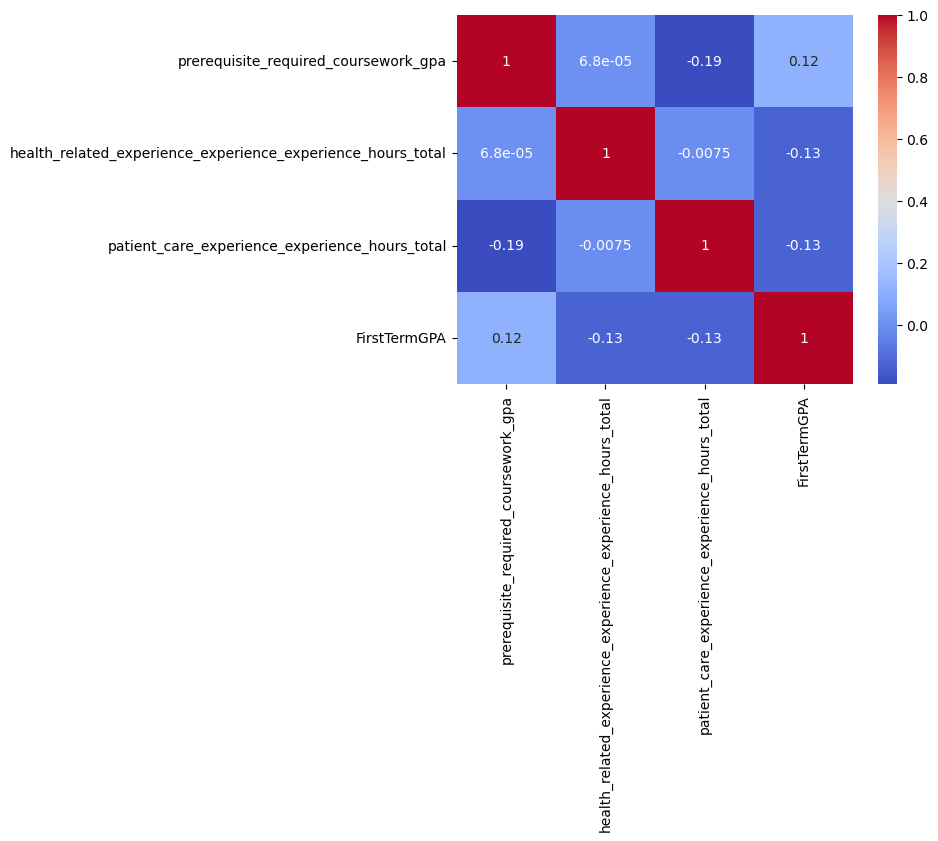

In [51]:
corr = var.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

### Fit model

In [53]:
from sklearn.linear_model import LinearRegression

term_model=LinearRegression()
term_model.fit(X, y)

LinearRegression()

## Checking Regression Assumptions

### R-Squared Value, Summary for first model

In [56]:
term_model_r2 = term_model.score(X, y)
print('R2: {0}'.format(term_model_r2))

R2: 0.04189543472482693


In [57]:
import statsmodels.api as sm

X_const = sm.add_constant(X)

model_sm = sm.OLS(y, X_const).fit()

print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:           FirstTermGPA   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1.705
Date:                Thu, 20 Mar 2025   Prob (F-statistic):              0.170
Time:                        15:39:29   Log-Likelihood:                -82.251
No. Observations:                 121   AIC:                             172.5
Df Residuals:                     117   BIC:                             183.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

### Define function to calculate residuals

In [59]:
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

In [60]:
calculate_residuals(term_model, X, y)

,Actual,Predicted,Residuals
1,4.00,3.425344,0.574656
3,2.99,3.459075,-0.469075
4,3.42,3.559659,-0.139659
5,3.36,3.501765,-0.141765
6,3.35,3.526312,-0.176312
...,...,...,...
123,3.64,3.572696,0.067304
124,3.13,3.441682,-0.311682
125,3.92,3.472643,0.447357
126,3.53,3.347122,0.182878


In [61]:
# Calculatie residuals for the plot
df_results = calculate_residuals(term_model, X, y)

### Assumption 1: Linearity

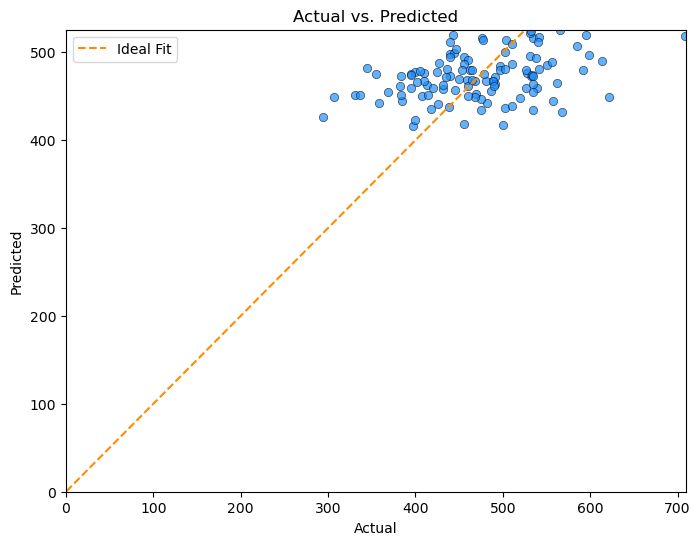

In [219]:
plt.figure(figsize=(8, 6))  # Set figure size
sns.scatterplot(x=df_results['Actual'], y=df_results['Predicted'], color='dodgerblue', alpha=0.7, edgecolor='black')

# Ideal prediction line
line_coords = np.arange(df_results.min().min(), df_results.max().max())
plt.plot(line_coords, line_coords, color='darkorange', linestyle='--', label='Ideal Fit')

# Set axis limits to start at 0
plt.xlim(0, df_results['Actual'].max() + 0.5)
plt.ylim(0, df_results['Predicted'].max() + 0.5)

# Titles & labels
plt.title('Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()


### Assumption 2: Normality of Residuals

p-value: 1.4633230100249766e-07


C:\Users\guarnerij2\AppData\Local\Temp\ipykernel_1764\365049450.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_results['Residuals'])


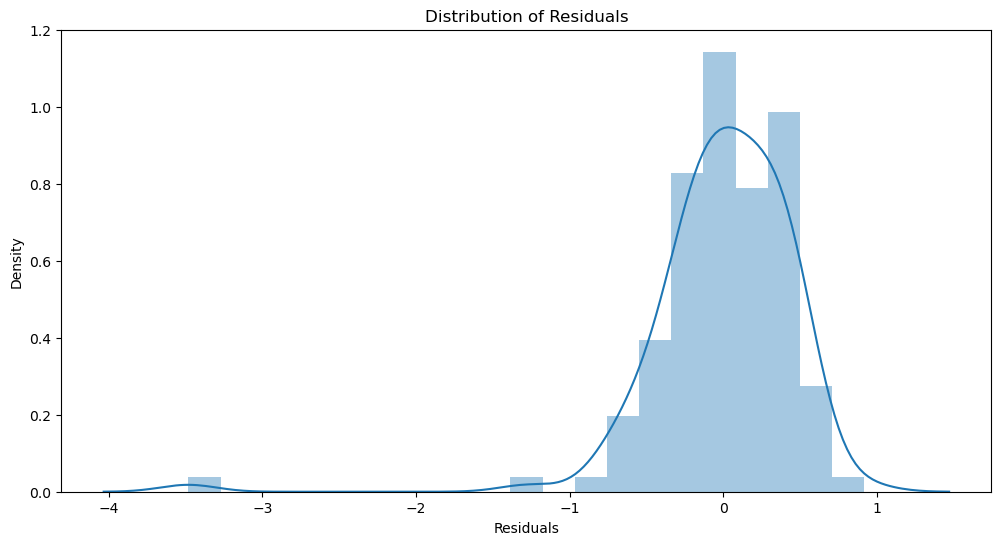

In [65]:
from statsmodels.stats.diagnostic import normal_ad
    
# Calculating residuals for the Anderson-Darling test
df_results = calculate_residuals(term_model, X, y)
    
# Performing the test on the residuals
p_value = normal_ad(df_results['Residuals'])[1]
print('p-value:', p_value)
    
# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(df_results['Residuals'])
plt.show()


### Assumption 3: Multicollinearity

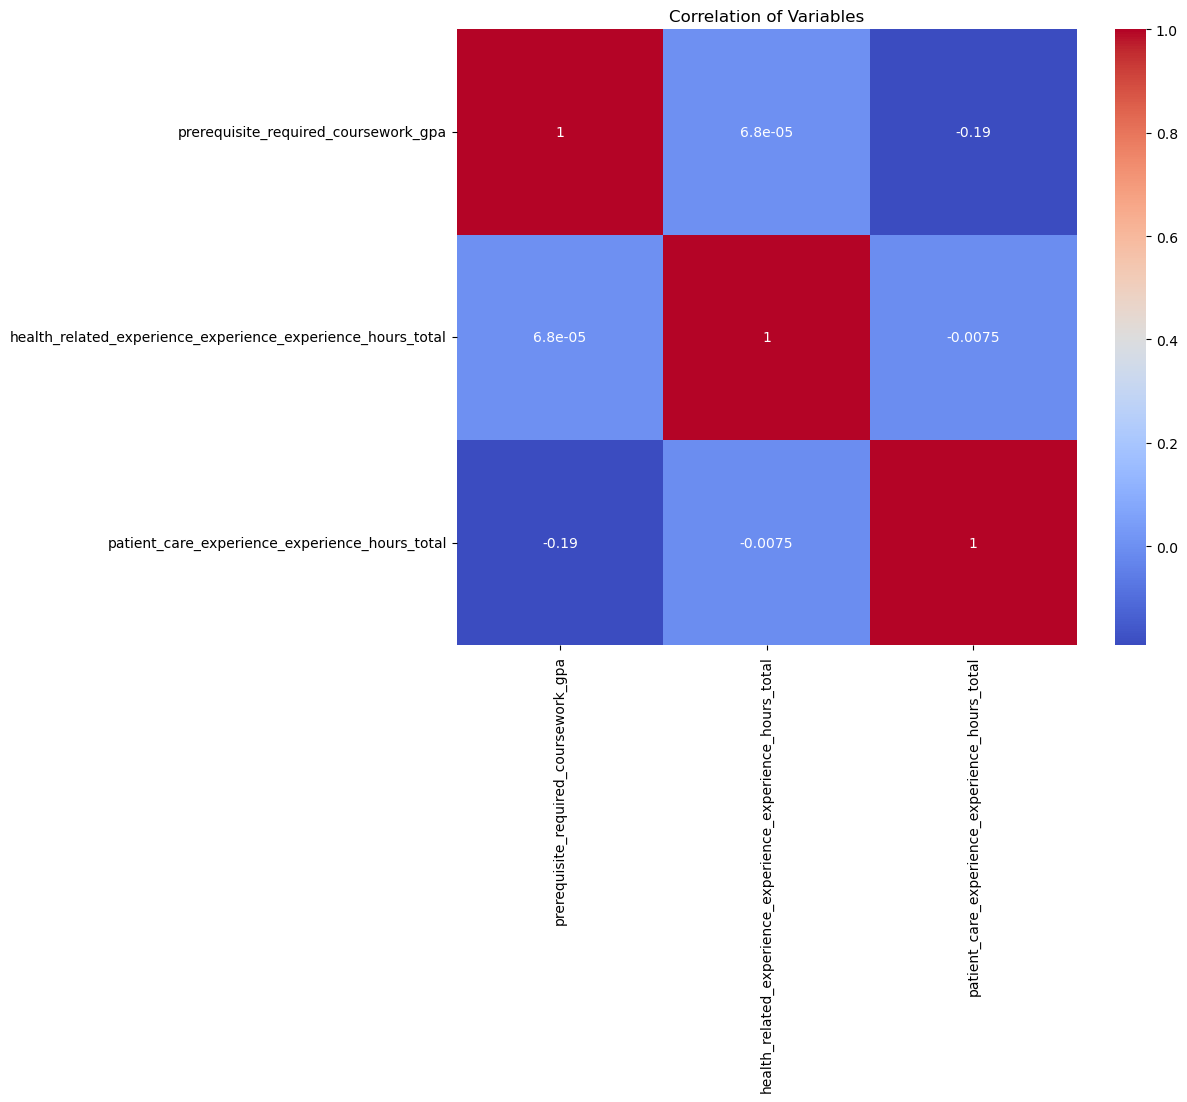

                                             Feature       VIF
0               prerequisite_required_coursework_gpa  2.490256
1  health_related_experience_experience_experienc...  1.186661
2     patient_care_experience_experience_hours_total  2.302276


In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Plotting the heatmap
plt.figure(figsize = (10,8))
sns.heatmap(pd.DataFrame(X).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation of Variables')
plt.show()

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


### Assumption 4: Homoscedasticity

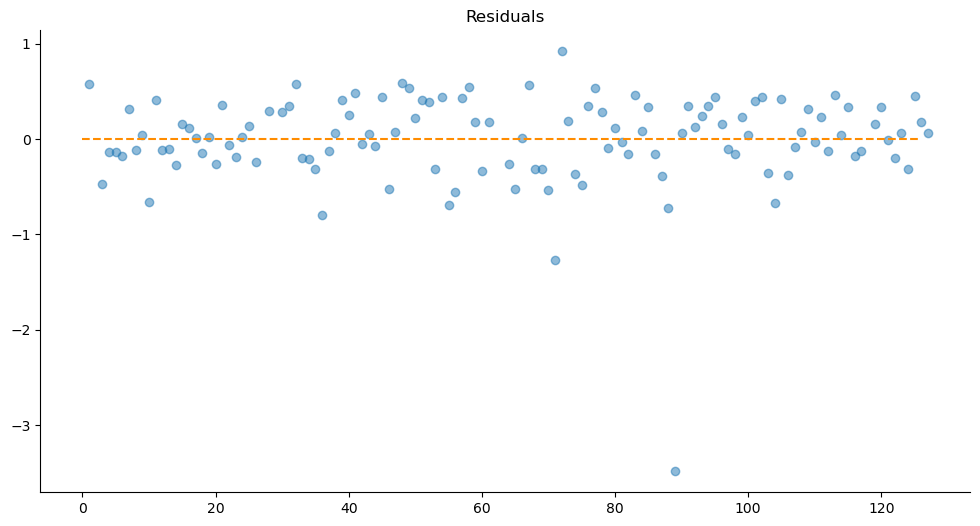

In [69]:
df_results = calculate_residuals(term_model, X, y)

# Plotting the residuals
plt.subplots(figsize=(12, 6))
ax = plt.subplot(111)
plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
ax.spines['right'].set_visible(False)  # Removing the right spine
ax.spines['top'].set_visible(False)  # Removing the top spine
plt.title('Residuals')
plt.show()  

## Preparation for Regression Analysis 2: Predictability of Admissions Characteristics on PANCE Score

### Load Data

In [72]:
pance = pd.read_excel('Applied Stats Final Project/PANCE Scores CO22_23_24.xlsx')

In [73]:
caspa_hist = pd.read_excel('Applied Stats Final Project/CASPA_CO22_23_24_Data.xlsx')

### Merge Data

In [75]:
pmerge = pd.merge(caspa_hist, pance, on='Last Name', how='left')

### Drop NA values, name columns to maintain confidentiality

In [77]:
pmerge = pmerge.dropna()

In [78]:
pmerge.isna().sum()

CASPA ID                                   0
Cohort                                     0
Last Name                                  0
First Name                                 0
overall_total_gpa                          0
bcp_totals_gpa                             0
gpa_overall_science_gpa                    0
prerequisite_required_coursework_gpa       0
prerequisite_recommended_coursework_gpa    0
Score                                      0
dtype: int64

In [79]:
pmerge = pmerge.drop(columns=['Last Name', 'First Name'])

In [80]:
pmerge

,CASPA ID,Cohort,overall_total_gpa,bcp_totals_gpa,gpa_overall_science_gpa,prerequisite_required_coursework_gpa,prerequisite_recommended_coursework_gpa,Score
0,5902942319,Class of 2023,3.72,3.67,3.61,3.81,4.00,531.0
1,7892212211,Class of 2022,3.30,3.25,3.34,3.70,3.15,355.0
2,1638022429,Class of 2022,3.15,2.91,3.04,3.00,3.00,397.0
3,1165938855,Class of 2023,3.24,3.07,3.25,3.26,3.00,482.0
4,9284959791,Class of 2022,3.15,2.98,2.98,3.71,2.76,526.0
...,...,...,...,...,...,...,...,...
121,8341825893,Class of 2023,3.30,3.10,3.21,3.41,3.00,460.0
122,5604666506,Class of 2023,3.45,3.27,3.34,3.66,3.43,535.0
123,6156146498,Class of 2023,3.33,3.24,3.19,3.61,4.00,431.0
124,7181722567,Class of 2023,3.82,3.72,3.76,3.88,3.61,585.0


### Check of dtypes and renaming

In [82]:
pmerge.dtypes

CASPA ID                                     int64
Cohort                                      object
overall_total_gpa                          float64
bcp_totals_gpa                             float64
gpa_overall_science_gpa                    float64
prerequisite_required_coursework_gpa       float64
prerequisite_recommended_coursework_gpa    float64
Score                                      float64
dtype: object

In [83]:
pmerge = pmerge.rename(columns={'Score':'PANCE Score'})

In [84]:
pmerge.columns

Index(['CASPA ID', 'Cohort', 'overall_total_gpa', 'bcp_totals_gpa',
       'gpa_overall_science_gpa', 'prerequisite_required_coursework_gpa',
       'prerequisite_recommended_coursework_gpa', 'PANCE Score'],
      dtype='object')

In [85]:
round(pmerge.describe(), 2)

,CASPA ID,overall_total_gpa,bcp_totals_gpa,gpa_overall_science_gpa,prerequisite_required_coursework_gpa,prerequisite_recommended_coursework_gpa,PANCE Score
count,1.130000e+02,113.00,113.00,113.00,113.00,113.00,113.00
mean,5.412141e+09,3.50,3.35,3.42,3.59,3.53,471.93
std,2.733905e+09,0.23,0.31,0.28,0.24,0.39,70.74
min,1.042285e+09,3.08,2.71,2.81,3.00,2.00,294.00
25%,2.775347e+09,3.32,3.10,3.22,3.42,3.30,426.00
50%,5.249041e+09,3.49,3.33,3.42,3.61,3.57,468.00
75%,7.762155e+09,3.67,3.52,3.57,3.77,3.89,528.00
max,9.996990e+09,3.99,3.99,3.99,4.00,4.00,709.00


### Define features for second regression model (un-comment to include/exclude GPA variables)

In [87]:
# #Prerequisite GPA
X = pmerge[['prerequisite_required_coursework_gpa','gpa_overall_science_gpa']]
y = pmerge['PANCE Score']

In [88]:
# #Overall total GPA
# X = pmerge[['overall_total_gpa', 'gpa_overall_science_gpa']]
# y = pmerge['PANCE Score']

In [89]:
# #Prerequisite GPA
var = pmerge[['prerequisite_required_coursework_gpa', 'gpa_overall_science_gpa','PANCE Score']]

In [90]:
# #Overall total GPA
# var = pmerge[['overall_total_gpa', 'gpa_overall_science_gpa','PANCE Score']]

<Axes: >

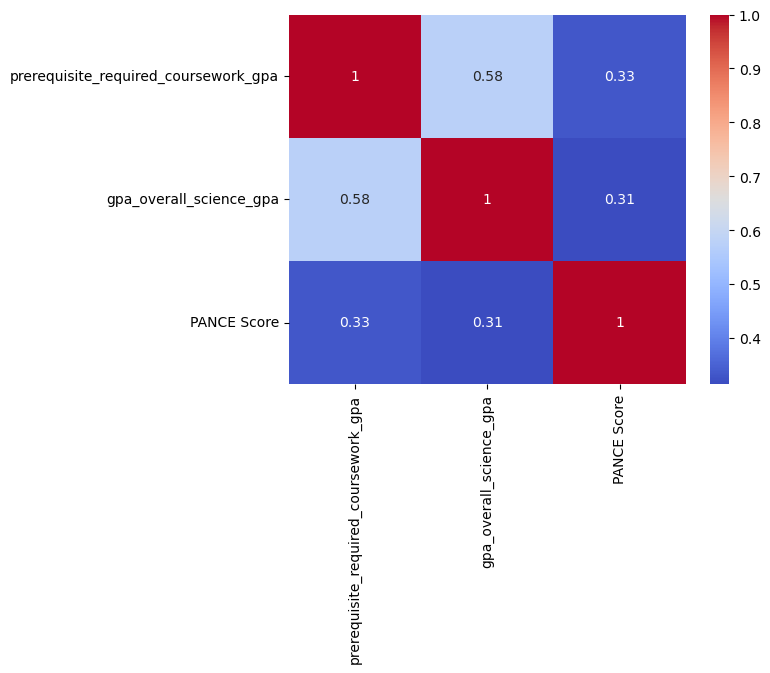

In [91]:
corr = var.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

### Fit model

In [93]:
from sklearn.linear_model import LinearRegression

In [94]:
pance_model = LinearRegression()

In [95]:
pance_model.fit(X, y)

LinearRegression()

### R Squared Value, Coefficients, Summary

In [97]:
pance_model_r2 = pance_model.score(X, y)
print('R2: {0}'.format(pance_model_r2))

R2: 0.13240712118593168


In [98]:
print('Coefficients:', pance_model.coef_)

Coefficients: [65.18083719 46.98509229]


In [99]:
import statsmodels.api as sm

X_const = sm.add_constant(X)

model_sm = sm.OLS(y, X_const).fit()

print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:            PANCE Score   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     8.394
Date:                Thu, 20 Mar 2025   Prob (F-statistic):           0.000405
Time:                        15:39:31   Log-Likelihood:                -633.08
No. Observations:                 113   AIC:                             1272.
Df Residuals:                     110   BIC:                             1280.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


### Define function for calculating residuals

In [101]:
def calculate_residuals(model, features, label):
  
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

calculate_residuals(pance_model, X, y)

,Actual,Predicted,Residuals
0,531.0,495.398958,35.601042
1,355.0,475.543091,-120.543091
2,397.0,415.820978,-18.820978
3,482.0,442.634865,39.365135
4,526.0,459.280267,66.719733
...,...,...,...
121,460.0,450.532587,9.467413
122,535.0,472.935858,62.064142
123,431.0,462.629052,-31.629052
124,585.0,507.009381,77.990619


### Assumption 1: Linearity

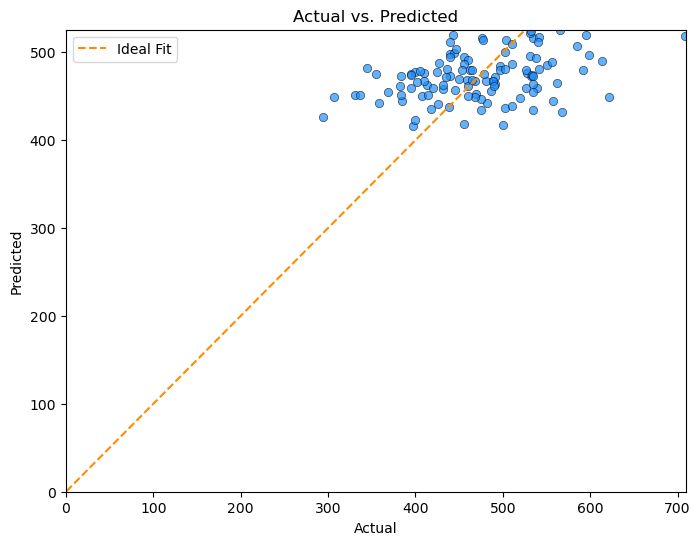

In [103]:
# Calculating residuals for the plot
df_results = calculate_residuals(pance_model, X, y)

plt.figure(figsize=(8, 6))  # Set figure size
sns.scatterplot(x=df_results['Actual'], y=df_results['Predicted'], color='dodgerblue', alpha=0.7, edgecolor='black')

# Ideal Regression line
line_coords = np.arange(df_results.min().min(), df_results.max().max())
plt.plot(line_coords, line_coords, color='darkorange', linestyle='--', label='Ideal Fit')

plt.xlim(0, df_results['Actual'].max() + 0.5)
plt.ylim(0, df_results['Predicted'].max() + 0.5)

# Titles & labels
plt.title('Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

### Assumption 2: Normality of residuals

p-value from the test: 0.8087268076996305


C:\Users\guarnerij2\AppData\Local\Temp\ipykernel_1764\4199871548.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_results['Residuals'])


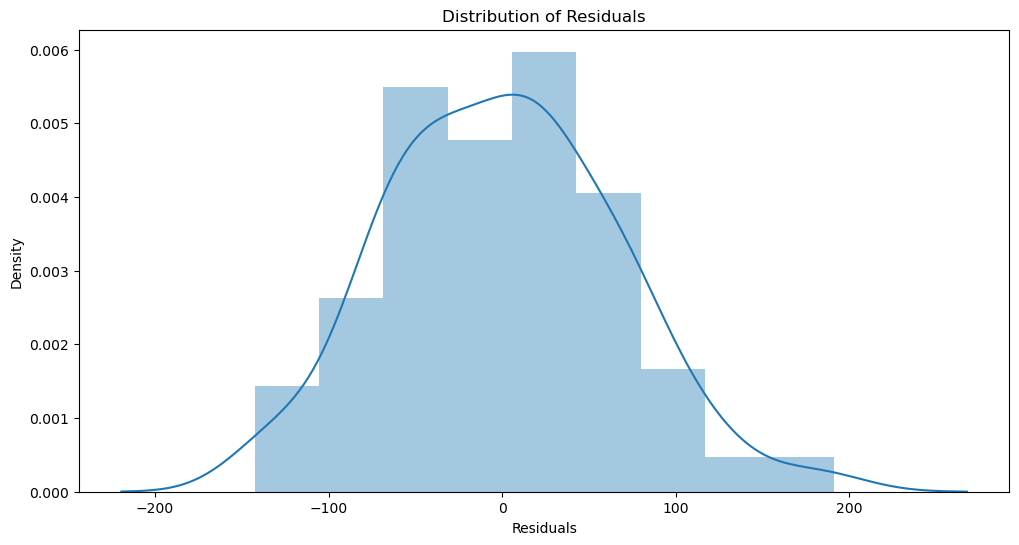

In [105]:
from statsmodels.stats.diagnostic import normal_ad
    
# Calculating residuals for the Anderson-Darling test
df_results = calculate_residuals(pance_model, X, y)
    
# Performing the test on the residuals
p_value = normal_ad(df_results['Residuals'])[1]
print('p-value from the test:', p_value)
    
# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(df_results['Residuals'])
plt.show()

### Assumption 3: Multicollinearity

In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

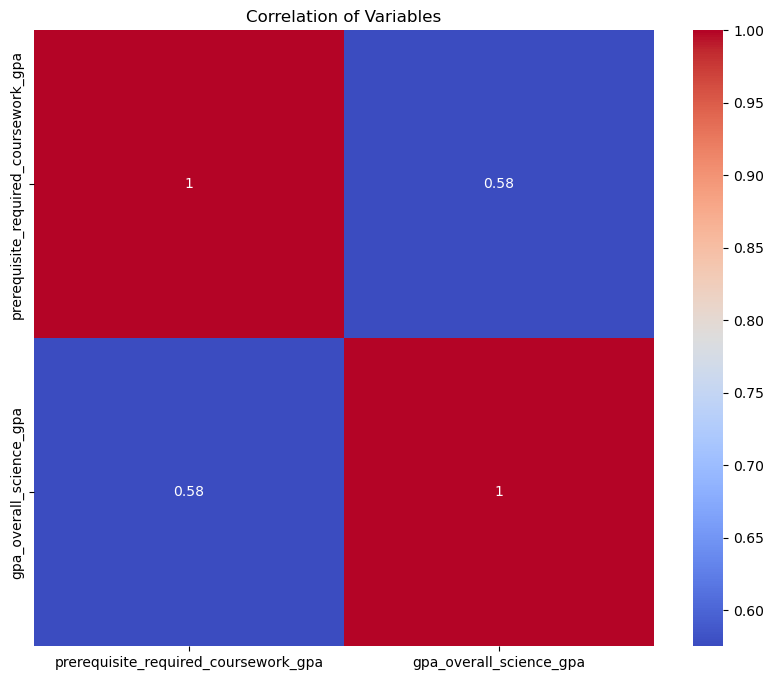

In [108]:
# Plotting the heatmap
plt.figure(figsize = (10,8))
sns.heatmap(pd.DataFrame(X).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation of Variables')
plt.show()

In [110]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [111]:
print(vif_data)

                                Feature         VIF
0  prerequisite_required_coursework_gpa  207.473547
1               gpa_overall_science_gpa  207.473547


### Assumption 4: Homoscedasticity

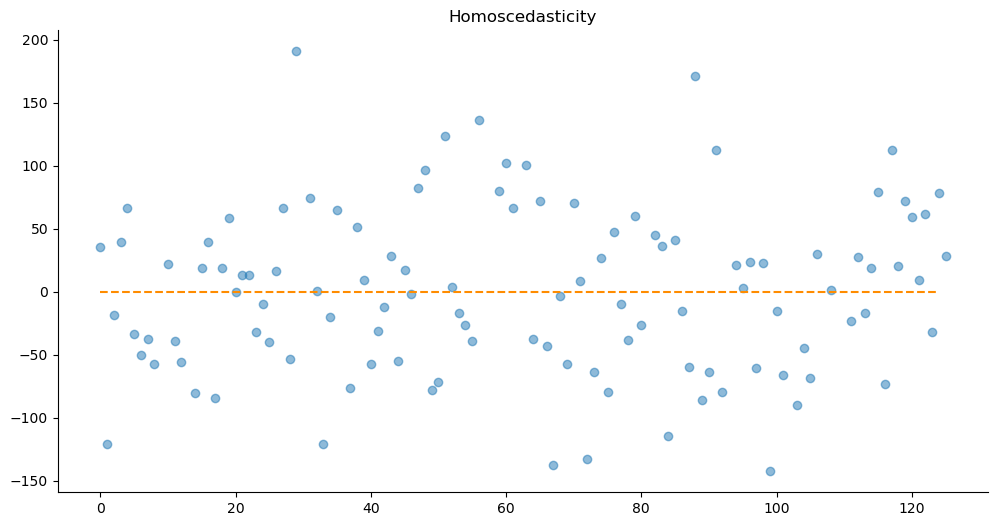

In [221]:
 df_results = calculate_residuals(pance_model, X, y)

# Plotting the residuals
plt.subplots(figsize=(12, 6))
ax = plt.subplot(111)
plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
ax.spines['right'].set_visible(False)  # Removing the right spine
ax.spines['top'].set_visible(False)  # Removing the top spine
plt.title('Homoscedasticity')
plt.show()  

### Research Question 3: Is First-Term GPA Predictive of PANCE score?

In [115]:
pmerge['CASPA ID'] = pmerge['CASPA ID'].astype(str)
df['cas_id'] = df['cas_id'].astype(str)

fmerge = pd.merge(pmerge, df, left_on='CASPA ID', right_on='cas_id', how='inner')

In [116]:
fmerge.head()

,CASPA ID,Cohort_x,overall_total_gpa_x,bcp_totals_gpa,gpa_overall_science_gpa,prerequisite_required_coursework_gpa_x,prerequisite_recommended_coursework_gpa,PANCE Score,cas_id,biochemistry_gpa,...,application_status,custom_field_date_conferred,inorganic_chemistry_gpa,organic_chemistry_gpa,other_sciences_gpa,mathematics_gpa,other_non_science_gpa,Cycle,Cohort_y,FirstTermGPA
0,3191589828,Class of 2024,3.34,3.22,3.42,3.61,3.90,440.0,3191589828,4.0,...,Verified,5/2020,3.13,2.17,3.59,3.27,2.92,2021-2022,Class of 2024,3.29
1,7699595706,Class of 2024,3.50,3.35,3.45,3.57,3.70,435.0,7699595706,3.7,...,Verified,5/2021,3.65,3.15,3.57,3.79,3.56,2021-2022,Class of 2024,3.10
2,7762154799,Class of 2024,3.86,3.78,3.84,3.68,3.68,440.0,7762154799,0.0,...,Verified,5/2021,3.40,3.86,3.97,3.50,3.96,2021-2022,Class of 2024,2.84
3,9316897979,Class of 2024,3.91,3.85,3.92,3.91,3.90,535.0,9316897979,3.7,...,Verified,5/2021,3.70,3.70,3.97,3.65,4.00,2021-2022,Class of 2024,3.66
4,5699486234,Class of 2024,3.98,3.98,3.98,4.00,4.00,565.0,5699486234,4.0,...,Verified,5/2021,3.96,3.89,4.00,4.00,3.97,2021-2022,Class of 2024,4.00


In [117]:
fmerge.isna().sum()

CASPA ID                                                       0
Cohort_x                                                       0
overall_total_gpa_x                                            0
bcp_totals_gpa                                                 0
gpa_overall_science_gpa                                        0
prerequisite_required_coursework_gpa_x                         0
prerequisite_recommended_coursework_gpa                        0
PANCE Score                                                    0
cas_id                                                         0
biochemistry_gpa                                               0
biology_zoology_gpa                                            0
english_gpa                                                    0
behavioral_sciences_gpa                                        0
baccalaureate_total_gpa                                        0
overall_total_gpa_y                                            0
overall_science_total_gpa

In [118]:
X2 = fmerge[['FirstTermGPA', 'baccalaureate_total_gpa', 'patient_care_experience_experience_hours_total', 'health_related_experience_experience_experience_hours_total', 'prerequisite_required_coursework_gpa_x']]
y2 = fmerge['PANCE Score']

In [119]:
X2_const = sm.add_constant(X2)

model_sm2 = sm.OLS(y2, X2_const).fit()

print(model_sm2.summary())

                            OLS Regression Results                            
Dep. Variable:            PANCE Score   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     7.879
Date:                Thu, 20 Mar 2025   Prob (F-statistic):           6.29e-05
Time:                        15:39:32   Log-Likelihood:                -193.10
No. Observations:                  38   AIC:                             398.2
Df Residuals:                      32   BIC:                             408.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

In [225]:
gpa_model = LinearRegression()
gpa_model.fit(X2, y2)

LinearRegression()

In [229]:
gpa_model.score(X2, y2)

0.5517775835181947

In [231]:
df_results2 = calculate_residuals(gpa_model, X2, y2)


In [245]:
df_results2

,Actual,Predicted,Residuals
0,440.0,445.010030,-5.010030
1,435.0,436.855264,-1.855264
2,440.0,421.146212,18.853788
3,535.0,531.263351,3.736649
4,565.0,564.519611,0.480389
5,491.0,488.979366,2.020634
6,532.0,495.097406,36.902594
7,481.0,517.796602,-36.796602
8,497.0,530.125544,-33.125544
9,460.0,450.345858,9.654142


<Axes: xlabel='Actual', ylabel='Predicted'>

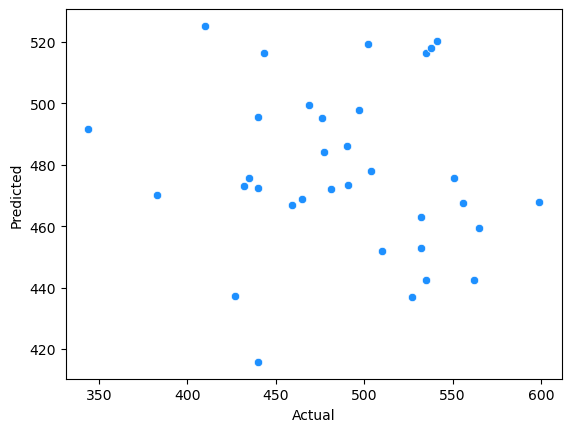

In [239]:
sns.scatterplot(x=df_results2['Actual'], y=df_results['Predicted'], color='dodgerblue')

C:\Users\guarnerij2\AppData\Local\Temp\ipykernel_1764\3486448347.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_results2['Residuals'])


<Axes: xlabel='Residuals', ylabel='Density'>

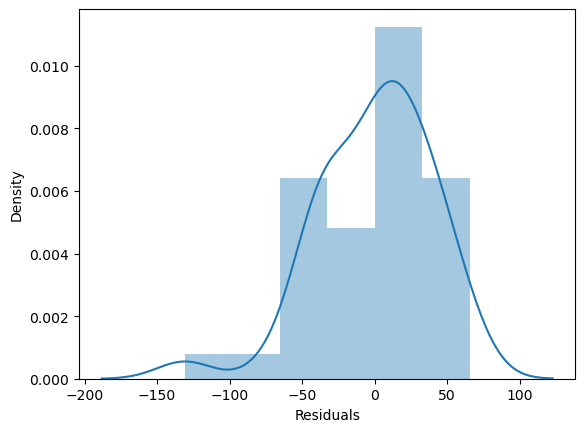

In [247]:
sns.distplot(df_results2['Residuals'])

In [259]:
vif = pd.DataFrame()
vif['Feature'] = X2.columns
vif['VIF'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif

,Feature,VIF
0,FirstTermGPA,115.272095
1,baccalaureate_total_gpa,354.081535
2,patient_care_experience_experience_hours_total,4.121480
3,health_related_experience_experience_experienc...,1.379479
4,prerequisite_required_coursework_gpa_x,423.654067


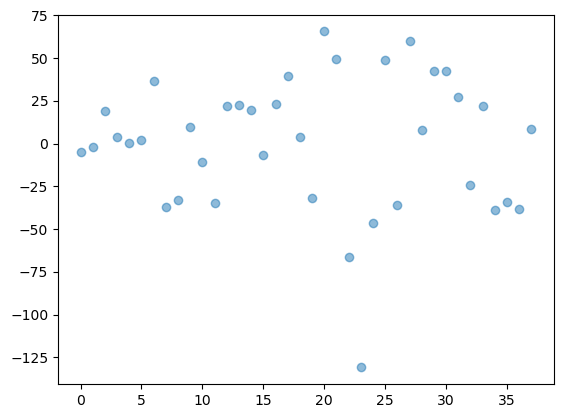

In [261]:
plt.scatter(x=df_results2.index, y=df_results2.Residuals, alpha=0.5)